In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from os.path import join

sns.set_style("darkgrid")

import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

## Hypotesis Testing

In [2]:
filename = "craigkelly-steam-game-data-hyp.csv"

df = pd.read_csv(join(filename))

In [3]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [4]:
df = df.drop(["QueryID","ResponseID","ResponseName","RecommendationCount"], axis = 1)


In [5]:
df.head()

,Metacritic,SteamSpyOwners
0,88.0,13033334.0
2,79.0,7621102.0
3,96.0,5927504.0
4,65.0,10489261.0
5,71.0,5368650.0


In [6]:
test_type = "SteamSpyOwners"

metacriticS = df[df["Metacritic"] > 50][test_type]
metacriticL = df[df["Metacritic"] < 50][test_type]

To test our  hypothesis, we divide our data to 2 which are Games that their Metacritic Score is greater than 50 and lower than 50.

To prove our  hypothesis , we choose <strong>Alternative Hypothesis</strong>


<p>So our  hypothesis  become<strong> " Metacritic Score of a game does not effects number of sales."</strong>.</p>


<!-- wp:paragraph -->
<p>So we do the <strong>t-test</strong>, and the results are:</p>
<!-- /wp:paragraph -->

In [7]:
stats.ttest_ind(metacriticS,metacriticL, equal_var=False) 

Ttest_indResult(statistic=7.631852493989717, pvalue=6.090947749875793e-14)

## Classification with Decision Tree :

Since classification works for specified values like true or false we used this techniques Decision tree implementation to predict is a game is Multiplayer or not Multiplayer.

In [8]:
filename = "craigkelly-steam-game-data-for-mch4.csv"
dftest2 = pd.read_csv('craigkelly-steam-game-data-for-mch4.csv')

In [9]:
dftest2=dftest2.drop(['QueryName',"QueryID","ResponseID","ResponseName","ReleaseDate","GenreIsEarlyAccess","ControllerSupport","IsFree","CategorySinglePlayer","CategoryMMO","CategoryInAppPurchase","GenreIsSimulation","GenreIsFreeToPlay","GenreIsSports","GenreIsRacing","RequiredAge"], axis = 1)

In [10]:
dftest2.head()

,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PlatformLinux,PlatformMac,CategoryMultiplayer,CategoryCoop,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsMassivelyMultiplayer,PriceInitial,Outcome
0,88,68991,13,13033334,0,1,1,1,0,0,1,0,0,0,0,0,9.99,1
1,79,2319,5,7621102,0,1,1,1,0,0,1,0,0,0,0,0,4.99,1
2,96,12486,11,5927504,0,1,1,1,0,0,1,0,0,0,0,0,9.99,1
3,65,7067,8,10489261,0,1,1,1,0,0,1,0,0,0,0,0,9.99,1
4,71,2219,5,5368650,0,1,1,0,0,0,1,0,0,0,0,0,4.99,1


In [11]:
X6 = dftest2.drop('CategoryMultiplayer', axis=1) # these are features
y6 = dftest2['CategoryMultiplayer']

In [12]:
from sklearn.model_selection import train_test_split


First we train our model with %70 of our original data, then we put our model into the  Decision tree.

In [13]:
# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42, test_size=0.30)
from sklearn import tree


In [14]:
model = tree.DecisionTreeClassifier()
model.fit(X6_train, y6_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
y6_predict = model.predict(X6_test)

In [16]:
from sklearn.metrics import accuracy_score

After that, our accuracy score is:

In [17]:
accuracy_score(y6_test, y6_predict)


0.7054409005628518

In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
confusion_matrix(y6_test, y6_predict)

array([[247,  79],
       [ 78, 129]], dtype=int64)

And our confusion matrix is:

In [20]:
pd.DataFrame(
    confusion_matrix(y6_test, y6_predict),
    columns=['Predicted Non Multiplayer', 'Predicted Multiplayer'],
    index=['Real Not Multiplayer', 'Real Multiplayer' ])

,Predicted Non Multiplayer,Predicted Multiplayer
Real Not Multiplayer,247,79
Real Multiplayer,78,129


## Classification with SVM:

<p>For this technique, we will try to predict is a game is Successful or not. First is games that have <strong>Metacritic Score greater then 50</strong> which are  Successful, other group is games that have <strong>Metacritic Score</strong> <strong> lower then 50</strong> which are Unsuccessful. </p>

In [21]:
filename = "craigkelly-steam-game-data-for-mch3.csv"
df5 = pd.read_csv('craigkelly-steam-game-data-for-mch3.csv')

In [22]:
df5 = df5.drop(["QueryID","ResponseID","QueryName","ResponseName","ReleaseDate","Metacritic"], axis = 1)



In [23]:
df5.head()

,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PriceInitial,Outcome
0,68991,13,13033334,0,9.99,1
1,2319,5,7621102,0,4.99,1
2,12486,11,5927504,0,9.99,1
3,7067,8,10489261,0,9.99,1
4,2219,5,5368650,0,4.99,1


In [24]:
features5 = df5.drop(["Outcome"], axis=1).values
target5 = df5["Outcome"]

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [26]:
#train-test split for the dataset
X5_train, X5_test, y5_train, y5_test = train_test_split(features5, target5, test_size=0.33, random_state=42)

In [27]:
clf = SVC(kernel="rbf")

In [28]:
clf.fit(X5_train, y5_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
y5_pred = clf.predict(X5_test)


When we train our data, our  accuracy score is: 

In [30]:
accuracy_score(y5_test, y5_pred)


0.9590443686006825

## Regression with Decision Tree :

Regression can work on large data range and can predict continuous responses such as Recommendation Count of a game.

In [31]:
filename = "craigkelly-steam-game-data-for-mch2.csv"
df2 = pd.read_csv('craigkelly-steam-game-data-for-mch2.csv')

In [32]:
df2 = df2.drop(["QueryID","ResponseID","QueryName","ResponseName","ReleaseDate","GenreIsEarlyAccess","ControllerSupport","IsFree","CategorySinglePlayer","CategoryMMO","CategoryInAppPurchase","GenreIsSimulation","GenreIsFreeToPlay","GenreIsSports","GenreIsRacing","GenreIsMassivelyMultiplayer"], axis = 1)


In [33]:
df2.head()

,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PlatformLinux,PlatformMac,CategoryMultiplayer,CategoryCoop,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,PriceInitial
0,0,88,68991,13,13033334,0,1,1,1,0,0,1,0,0,0,0,9.99
1,0,79,2319,5,7621102,0,1,1,1,0,0,1,0,0,0,0,4.99
2,0,96,12486,11,5927504,0,1,1,1,0,0,1,0,0,0,0,9.99
3,0,65,7067,8,10489261,0,1,1,1,0,0,1,0,0,0,0,9.99
4,0,71,2219,5,5368650,0,1,1,0,0,0,1,0,0,0,0,4.99


In [34]:
from sklearn.model_selection import train_test_split

X2 = df2.drop('RecommendationCount', axis=1) # these are features
y2 = df2['RecommendationCount']  

In [35]:
# Creating train and test datasets with train_test_split function
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0) 

In [36]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X2_train, y2_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
y2_pred = regressor.predict(X2_test)

In [38]:
df_compare = pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred}) 

<!-- wp:paragraph -->
<p>Regression can work on large data range and can predict continuous responses such as Recommendation Count of a game. Some of our predictions are:</p>
<!-- /wp:paragraph -->

In [39]:
df_compare

,Actual,Predicted
1366,121,210.0
568,555,451.0
1686,810,251.0
1291,288,315.0
1364,234,166.0
1271,112,210.0
1148,1752,3393.0
575,511,3545.0
785,20533,20533.0
1452,130,450.0


# Rest of the code is for our Unsuccessful Attempts

## Unsuccessful Clustering with K-means Attempt:

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import random
from copy import deepcopy
import matplotlib.lines as mlines

# interactivity
from ipywidgets import interact

sns.set_style("darkgrid")

%matplotlib inline

In [41]:
# importing Kmeans
from sklearn.cluster import KMeans
# finding the distances between centroid and data points
from scipy.spatial import distance

In [42]:
data15 = pd.read_csv('craigkelly-steam-game-data-for-mch3.csv')


In [43]:
data16=data15

In [44]:
data15.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PriceInitial,Outcome
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,88,68991,13,13033334,0,9.99,1
1,30,30,Day of Defeat,Day of Defeat,May 1 2003,79,2319,5,7621102,0,4.99,1
2,70,70,Half-Life,Half-Life,Nov 8 1998,96,12486,11,5927504,0,9.99,1
3,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,8,10489261,0,9.99,1
4,130,130,Half-Life: Blue Shift,Half-Life: Blue Shift,Jun 1 2001,71,2219,5,5368650,0,4.99,1


In [45]:
data15 = data15.drop(["QueryID","ResponseID","QueryName","ResponseName","ReleaseDate","Outcome"], axis = 1)

data15.drop(["RecommendationCount","ScreenshotCount","AchievementCount"," PriceInitial "], axis = 1)


,Metacritic,SteamSpyOwners
0,88,13033334
1,79,7621102
2,96,5927504
3,65,10489261
4,71,5368650
5,96,9901173
6,88,15433570
7,80,6400269
8,87,6298399
9,90,9795716


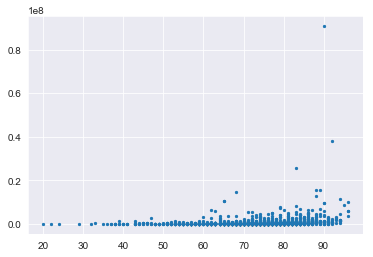

In [46]:
plt.scatter(data15["Metacritic"],data15["SteamSpyOwners"], s=5)
plt.show()

In [47]:
# create kmeans model and set k as 5
model = KMeans(n_clusters=7)
model.fit(data15)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

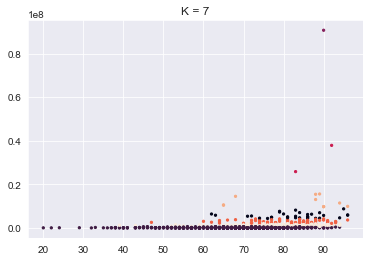

In [48]:
# get the resulting the cluster labels
labels = model.labels_

plt.scatter(data15["Metacritic"],data15["SteamSpyOwners"], c=labels, s=5)
plt.title("K = 7")
plt.show()

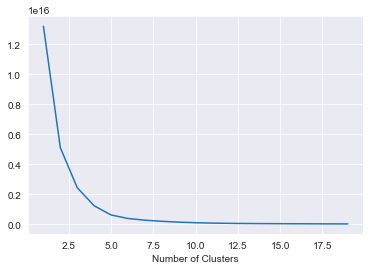

In [49]:
# define number of cluster range
n_clusters_range = np.arange(1, 20)
# store intra cluster variation value
intra_cluster_var = []

for k in n_clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(data15)
    
    # append intra cluster variation, i.e. inertia attribute in the model
    intra_cluster_var.append(model.inertia_)
    
plt.plot(n_clusters_range, intra_cluster_var)
plt.xlabel("Number of Clusters")
plt.show()

## Unsuccessfull Principal Component Analysis


In [50]:
from sklearn.decomposition import PCA

In [51]:
data17=data16

In [52]:
data16=data17

In [53]:
data16.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PriceInitial,Outcome
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,88,68991,13,13033334,0,9.99,1
1,30,30,Day of Defeat,Day of Defeat,May 1 2003,79,2319,5,7621102,0,4.99,1
2,70,70,Half-Life,Half-Life,Nov 8 1998,96,12486,11,5927504,0,9.99,1
3,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,8,10489261,0,9.99,1
4,130,130,Half-Life: Blue Shift,Half-Life: Blue Shift,Jun 1 2001,71,2219,5,5368650,0,4.99,1


In [54]:
data16 = data16.drop(["QueryID","ResponseID","QueryName","ResponseName","ReleaseDate"], axis = 1)
data16.head()

,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,AchievementCount,PriceInitial,Outcome
0,88,68991,13,13033334,0,9.99,1
1,79,2319,5,7621102,0,4.99,1
2,96,12486,11,5927504,0,9.99,1
3,65,7067,8,10489261,0,9.99,1
4,71,2219,5,5368650,0,4.99,1


In [55]:
features2 = data16.drop(["Outcome"], axis=1).values
labels2 = data16["Outcome"].values

In [56]:
# for visualization purposes
# we need 2 dimensions
decomp = PCA(n_components=2)

# find principal components and 
# transform the original data
reduced_features = decomp.fit_transform(features2)
reduced_features

array([[ 1.23225276e+07, -5.22758251e+04],
       [ 6.90990823e+06, -6.81497725e+04],
       [ 5.21648024e+06, -4.20883906e+04],
       ...,
       [-6.57963417e+05,  1.71063250e+03],
       [-7.01193899e+05,  1.11633503e+03],
       [-7.09086011e+05,  1.14140258e+03]])

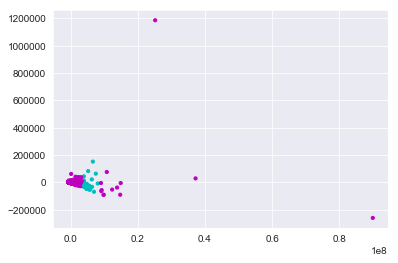

In [57]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=np.where(labels == 0, "c", "m"), s=10)
plt.show()

In [58]:
# create the clustering model
model = KMeans(n_clusters=2)
# fit the transformed data
model.fit(reduced_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

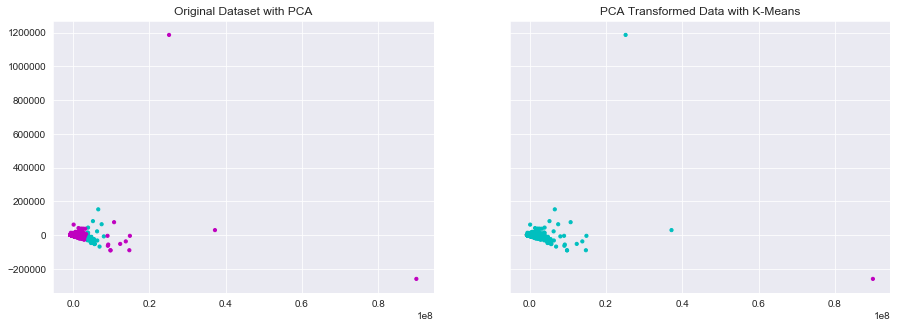

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axs[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=np.where(labels == 0, "c", "m"), s=10)
axs[0].set_title("Original Dataset with PCA")

# get cluster labels
cluster_labels = model.labels_

# plots data points with cluster label color encodings
axs[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=np.where(model.labels_ == 0, "c", "m"), s=10)
axs[1].set_title("PCA Transformed Data with K-Means")
plt.show()

In [60]:
# import homogeneity score
from sklearn.metrics import homogeneity_score

In [61]:
# returns a pathetic score
homogeneity_score(labels, cluster_labels)

0.006247509857142705